In [1]:
import os
import glob
from math import floor

from scipy.stats import entropy
import numpy as np
import librosa

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# snd_seltab = '/home/ys587/__Data/__whistle/__cv_os_vs_gilli/__sound_seltab/STR_96kHz.txt'
# sound_species_target = '/home/ys587/__Data/__whistle/__whistle_gillispie/96kHz/STR'

conf_samplerate = 48000
conf_hop_length = int(0.02*48000)
conf_fmin = 3000.0
conf_bins_per_octave = 48
conf_n_bins = 144
conf_time_multi = floor(1. / 0.02)  # floor(conf['win_size'] / conf['time_reso'])
conf_time_multi_hop = floor(0.5 / 0.02)  # floor(conf['hop_size'] / conf['time_reso'])

# wav_list = glob.glob(sound_species_target + '/*.wav')
# wav_list.sort()
wav_list = ['/home/ys587/__Data/__whistle/__whistle_gillispie/96kHz/STR/STR11.wav']
# wav_list = ['/home/ys587/__Data/__whistle/__whistle_gillispie/96kHz/CD/CD12.wav']
# wav_list = ['/home/ys587/__Data/__whistle/__whistle_gillispie/48kHz/BD/BD1.wav']

samples, _ = librosa.load(wav_list[0], sr=conf_samplerate)
whistle_freq = np.abs(librosa.pseudo_cqt(samples, sr=conf_samplerate,
                                             hop_length=conf_hop_length,
                                             fmin=conf_fmin,
                                             bins_per_octave=conf_bins_per_octave,
                                             n_bins=conf_n_bins))

array([3.95145883, 3.94139979, 3.92132383, 3.92524048, 3.91821785,
       3.90605923, 3.90153458, 3.91718787, 3.91618677, 3.9049506 ,
       3.90403646, 3.93120643, 3.97187494])

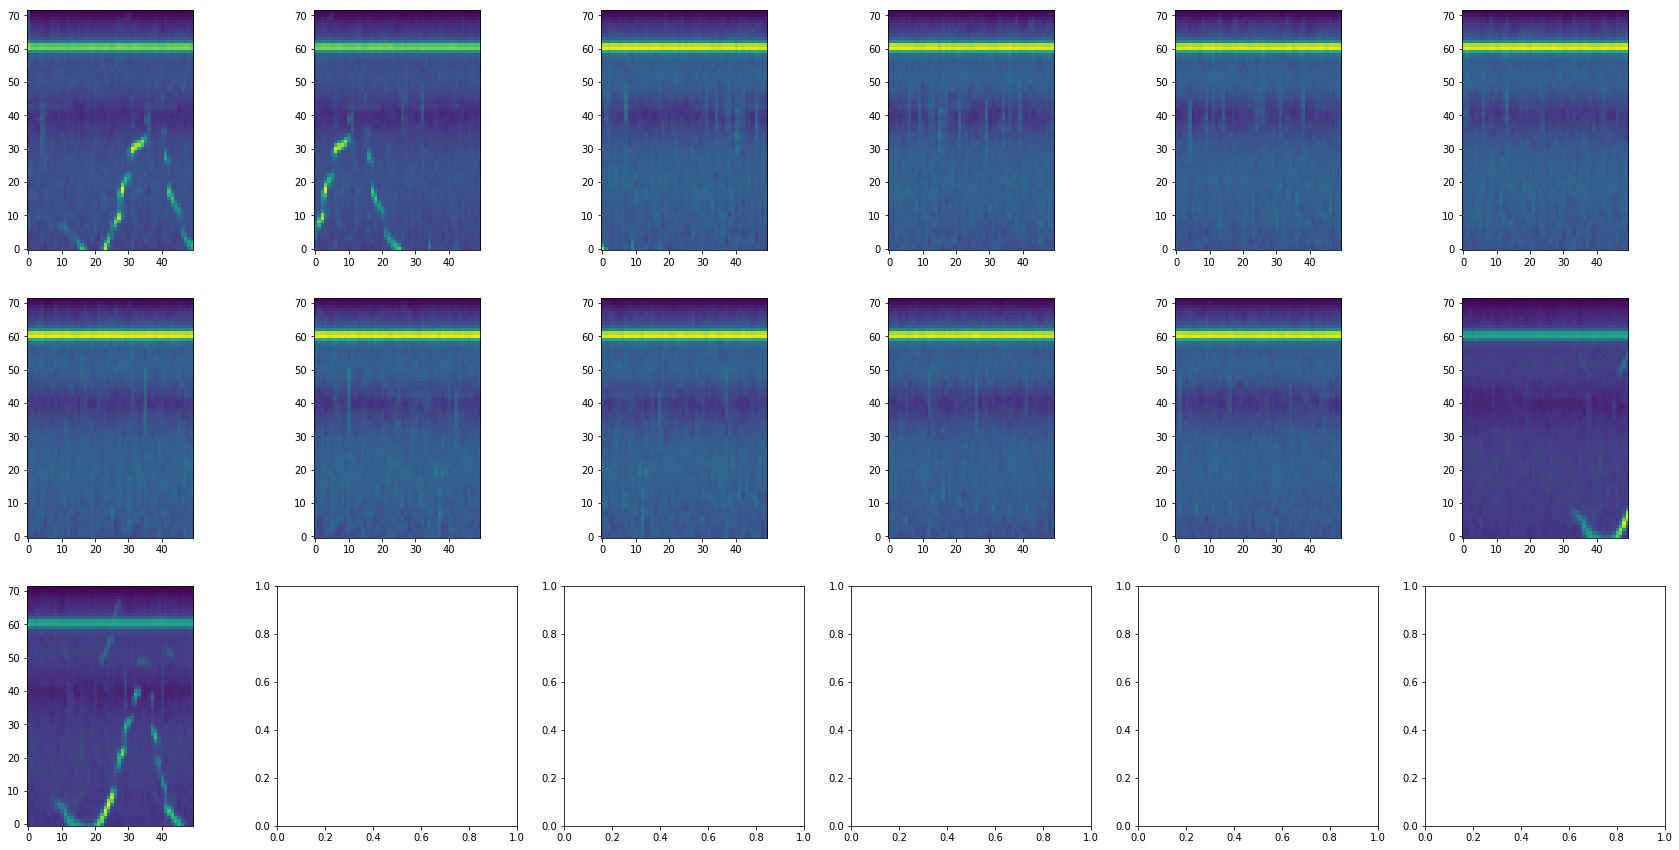

In [3]:
def draw_spectro(whistle_spectro, dim_x, conf_time_multi=conf_time_multi, conf_time_multi_hop=conf_time_multi_hop):
    win_num = floor((whistle_spectro.shape[1] - conf_time_multi) / conf_time_multi_hop)+1
    dim_y = floor((win_num-1) / dim_x) + 1
    fig, ax_fea = plt.subplots(dim_y, dim_x, figsize=(30, 5*dim_y))
    
    whistle_spectro = whistle_spectro[72:, :]

    entropy_val = np.zeros(win_num)
    for nn in range(win_num):
        whistle_spectro_curr = whistle_spectro[:, nn * conf_time_multi_hop:nn * conf_time_multi_hop + conf_time_multi]
        
        loc1 = floor(nn/dim_x)
        loc2 = nn % dim_x
        im = ax_fea[loc1, loc2].imshow(whistle_spectro_curr**.5, origin='lower')
        entropy_val[nn] = entropy(whistle_spectro_curr.mean(axis=1))
        # fig.colorbar(im, ax=ax_fea[loc2])
    
    return entropy_val

draw_spectro(whistle_freq, dim_x=6)
# print(entropy_val)

Using TensorFlow backend.
/home/ys587/PycharmProjects/python36_tensorflow12/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ys587/PycharmProjects/python36_tensorflow12/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ys587/PycharmProjects/python36_tensorflow12/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint1

array([2.75731623, 2.5984125 , 1.89155416, 1.87592457, 2.62203225,
       2.31601662, 2.48358493, 2.56581624, 2.1483744 , 2.12733049,
       2.40261071, 1.80761181, 3.08001144])

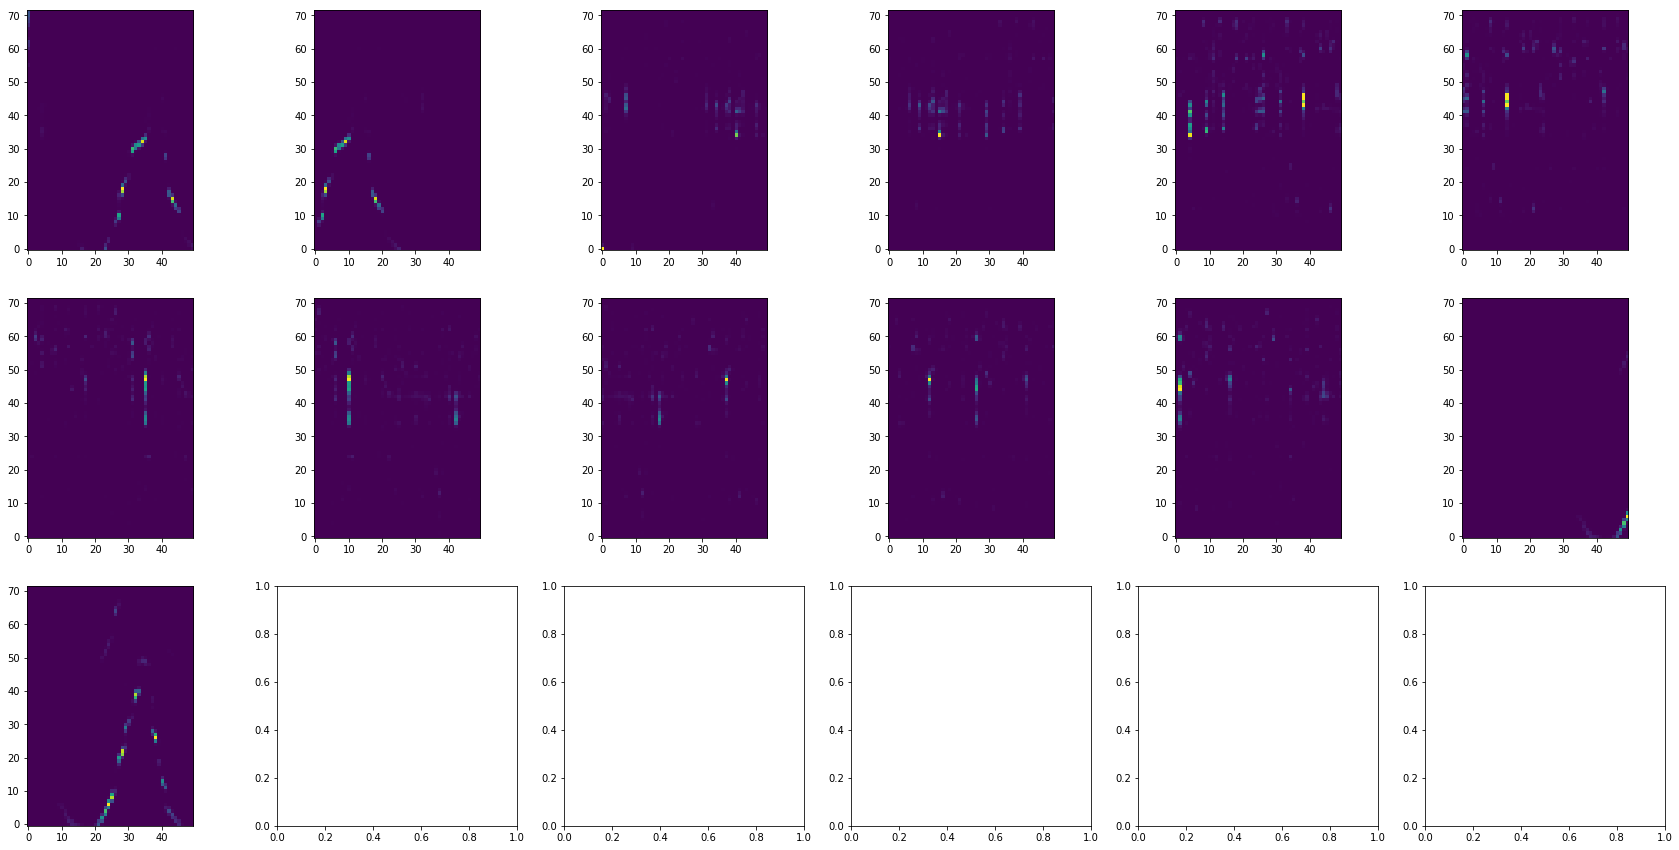

In [4]:
from species_lib import powerlaw
draw_spectro(powerlaw(whistle_freq), dim_x=6)

array([2.49904384, 2.46203114, 0.04631902, 0.4921385 , 2.65504622,
       2.54992989, 1.80186244, 1.70658617, 1.185399  , 1.28292907,
       1.96646204, 1.64609105, 2.79377981])

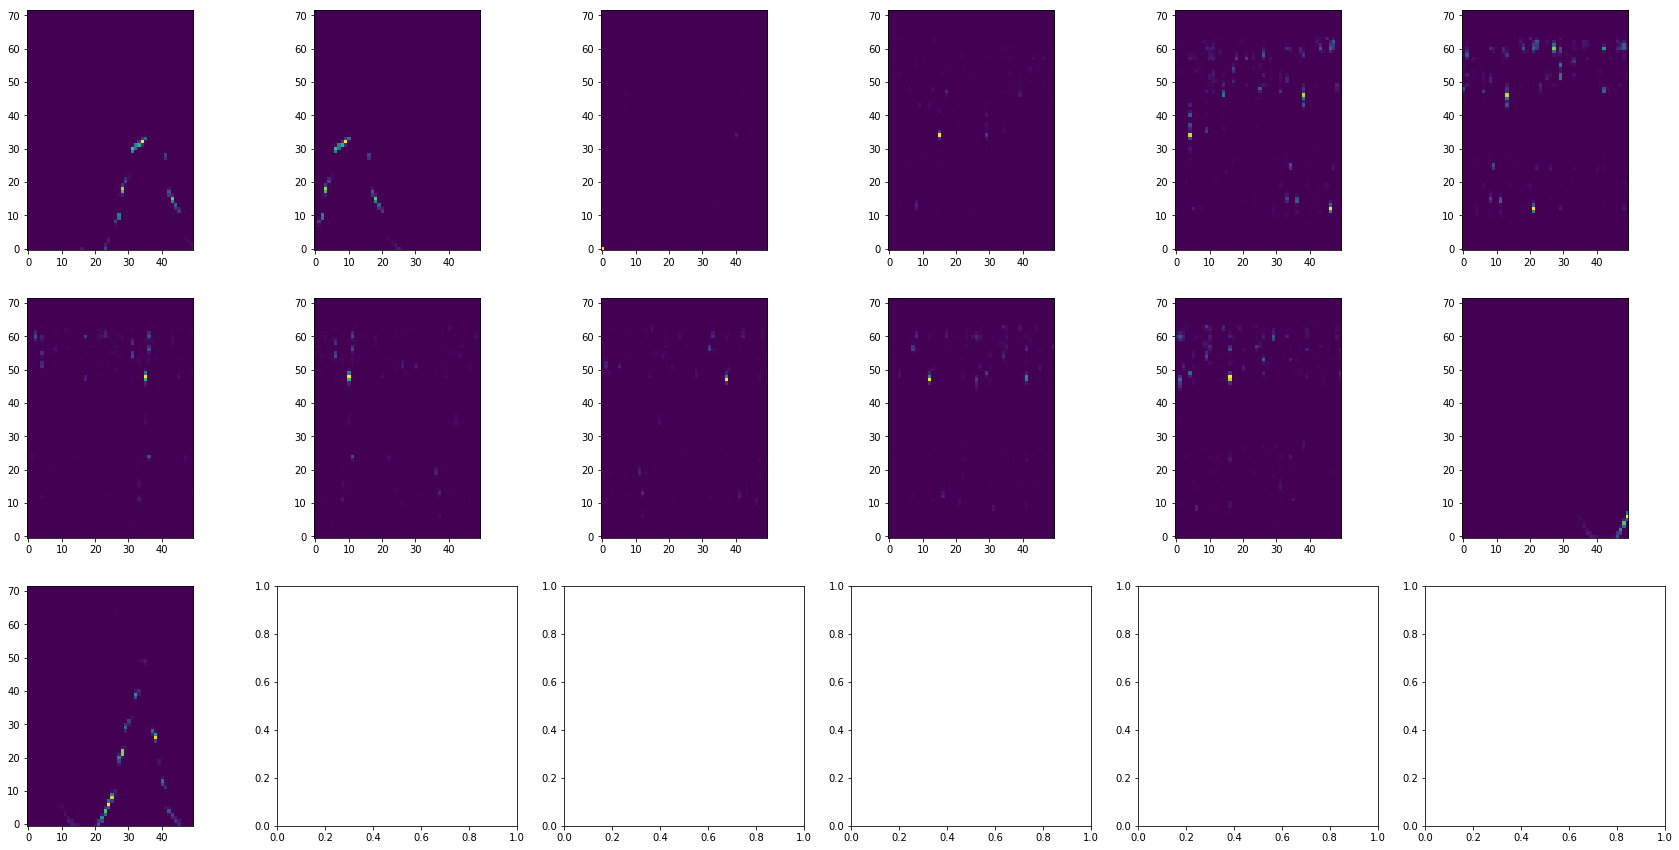

In [5]:
from species_lib import powerlawsym
draw_spectro(powerlawsym(whistle_freq), dim_x=6)

array([4.27252165, 4.27504814, 4.27497766, 4.27631071, 4.27634168,
       4.27636443, 4.27637307, 4.27643507, 4.27649659, 4.27632598,
       4.2764968 , 4.27427464, 4.27612654])

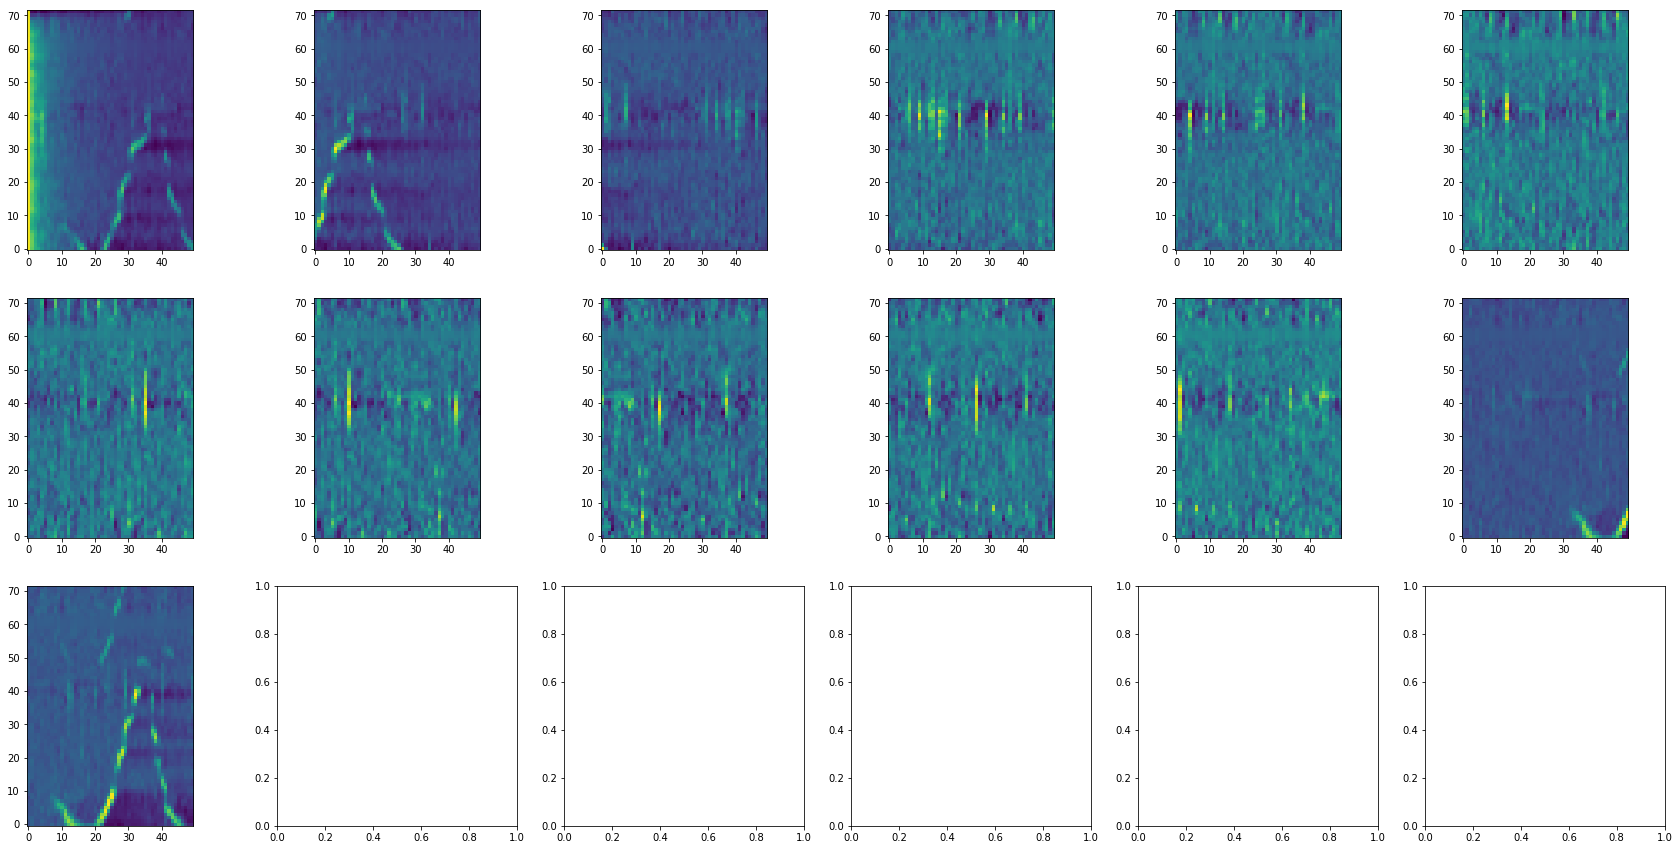

In [6]:
from librosa import pcen
draw_spectro(pcen(whistle_freq * (2 ** 31)), dim_x=6)

array([4.26550113, 4.27003595, 4.27339929, 4.27554913, 4.27453871,
       4.27533905, 4.27538091, 4.27590625, 4.27609826, 4.27542064,
       4.27599656, 4.27392964, 4.27333695])

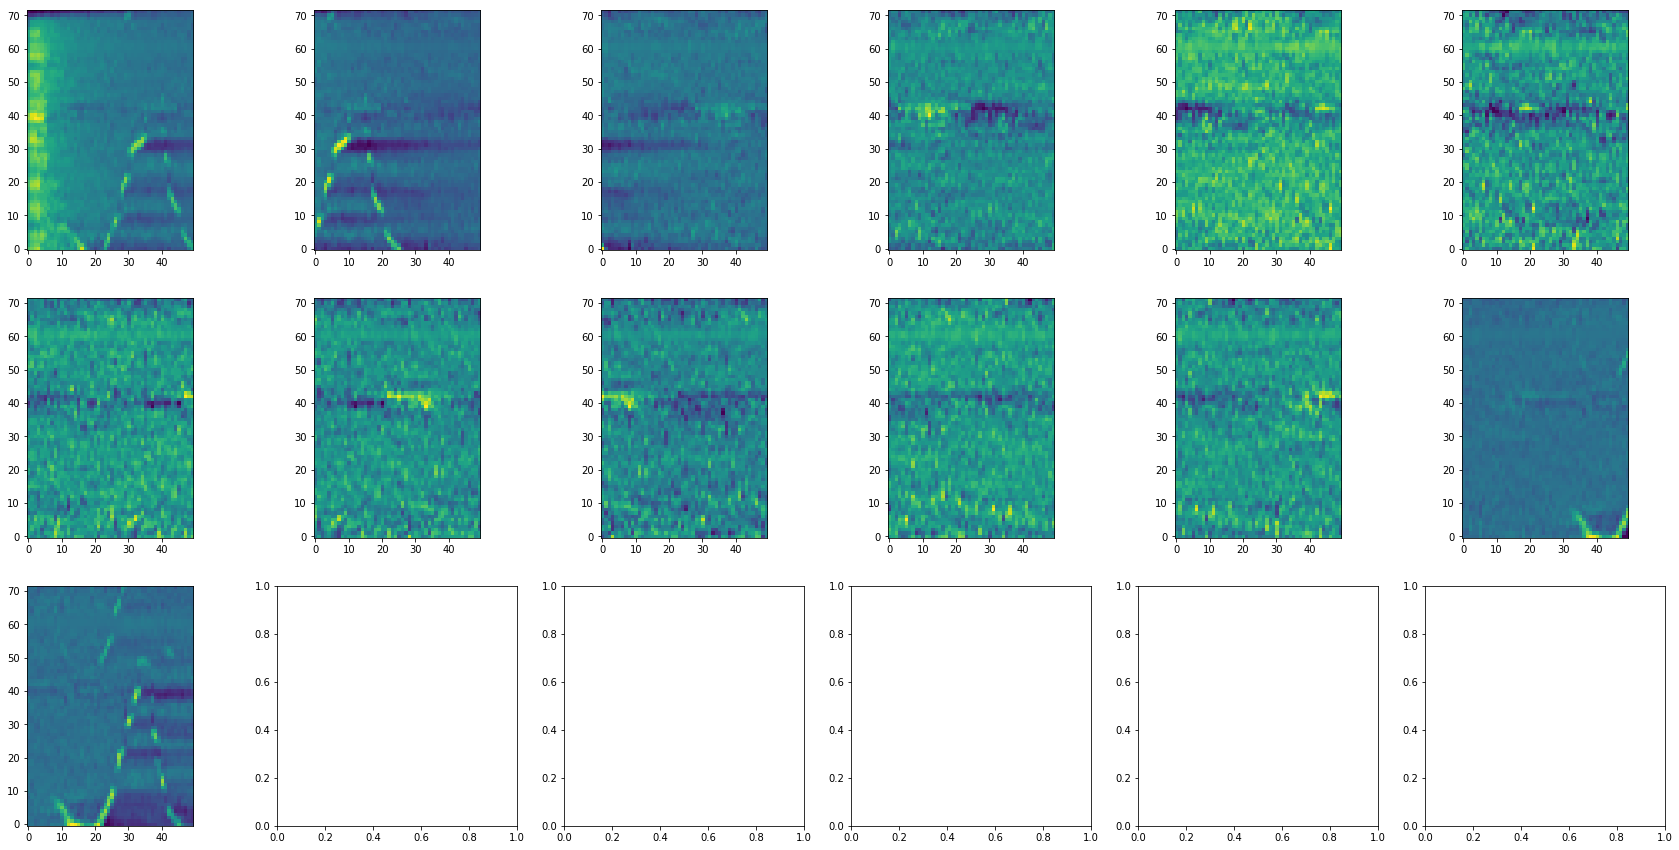

In [7]:
from species_lib import nopulse_separation
draw_spectro(nopulse_separation(pcen(whistle_freq * (2 ** 31))), dim_x=6)
# draw_spectro(nopulse_separation(whistle_freq * (2 ** 31)), dim_x=6)
# draw_spectro(nopulse_separation(powerlaw(whistle_freq)), dim_x=6)
# draw_spectro(powerlaw(whistle_freq), dim_x=6)